In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import numpy as np
from tqdm import tqdm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import cm
plt.rcParams.update({'font.size': 14, 'lines.markersize' : 4})

from scipy.optimize import curve_fit
import sys, os
import time, datetime
from datetime import timedelta
import pandas as pd
sys.path.append('/reg/d/psdm/tmo/tmox51020/results/paris/recon')
from recon_funcs import *
import h5py
from scipy.interpolate import interp1d
sys.path.append('/reg/neh/home/tdd14/modules/cart2pol/cart2pol')
import cart2pol
from cart2pol import PolarRebin
import scipy.ndimage as scimg

/reg/neh/home/tdd14/modules/CPBASEX/pbasex-Python/pbasex/gData.py:55: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gData['rBF'] is not 'custom':


Hi! I imported. 


In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap
my_cmap = cm.get_cmap('jet')
xr = np.linspace(0, 1, 2000)
my_cmap = my_cmap(xr)
my_cmap[0][-1] = 0
my_cmap = ListedColormap(my_cmap)

In [ ]:
def make_MM(x0):
    xshift, yshift =  x0[8], x0[9] 

    # Coordinates that you want to Perspective Transform
    pts1 = np.float32([[0,0],\
                       [0,1024],\
                       [1024,0],\
                       [1024, 1024]])


    # Size of the Transformed Image
    pts2 = np.float32([[0+xshift-x0[0],0 + yshift-x0[1]],\
                       [0+xshift-x0[2],1024 + yshift-x0[3]],\
                       [1024+xshift-x0[4],0 + yshift-x0[5]],\
                       [1024+xshift-x0[6],1024 + yshift-x0[7]]])

    MM = cv2.getPerspectiveTransform(pts1,pts2)
    return MM

X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskhm=np.zeros((1024,1024))
maskhm[(rs>120) & (rs<420)]=1
nmask = np.reshape(rebin(rebin(maskhm,4),4),[64**2,])


x,y, = 530,512
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-x)**2+(Y-y)**2)
mask=np.zeros((1024,1024))
mask[rs>1*48]=1

nmask = np.reshape(rebin(rebin(maskhm,4),4),[64**2,]) #rebin later
nnmask = (rebin(np.reshape(nmask, [64,64]))).flatten()
nnmask = rebin(rebin(maskhm,4),4)
#nnmask = (rebin(np.reshape(nmask, [64,64])*(inbg))).flatten()
nnmask[nnmask<0.5] = 0
nnmask[nnmask>=0.5] = 1

maskscale = np.zeros((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale [(rs>120) & (rs<270)]=1

In [ ]:
def make_quads(x0):
    quads=np.ones((1024,1024))
    quads[:512,:512]= x0[0]
    quads[:512,512:]= x0[1]
    quads[512:,:512]= x0[2]
    quads[512:,512:]= x0[3]
    return quads


In [ ]:
ex1 = {}
ex1['runnum'] = 121
ex1['thresh'] = 32
ex1['MM'] = make_MM([-17.998,-2.74, 17.9, -17.39, 17.86, 8.52, -3.85, 17.9, 11.47, 47.86])
ex1['quads'] = cv2.warpPerspective(make_quads([0.9026274050743817, 0.9353278845403191, 0.9429386493966182, 0.9696706189015828]),ex1['MM'],(1024,1024))
ex1['resid'] = np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Jan/bg_run_121_Mar.npy')

maskscale = np.zeros((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale[(rs>140) & (rs<220) & (X>28*16) &(X<36*16)]=1
fanmask = np.ones((1024,1024))
ex1['maskscale'] = maskscale
ex1['fanmask'] = fanmask
ex1['mfn'] = 25 
ex1['gfn'] = 15
ex1['ID'] = [8]
ex1['tt'] = np.array([4410489422587031999], dtype =np.uint64)


ex2 = {}
ex2['runnum'] = 123
ex2['thresh'] = 32
ex2['MM'] = make_MM([-17.998,-2.74, 17.9, -17.39, 17.86, 8.52, -3.85, 17.9, 11.47, 47.86])
ex2['quads'] = cv2.warpPerspective(make_quads([0.92,0.95569523, 0.96540272, 0.99122144]),ex2['MM'],(1024,1024))
ex2['resid'] = np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Jan/bg_run_123_Mar.npy')

X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale[(rs>130) & (rs<220)]=1
maskscale[(Y>26*16) & (Y<38*16)]=0
fanmask = np.ones((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
fanmask [(16*46.5<X) &(X<16*58) & (32*16<Y) & (Y<42*16)]=0

ex2['maskscale'] = maskscale
ex2['fanmask'] = fanmask
ex2['mfn'] = 25 
ex2['gfn'] = 15
ex2['ID'] = [95]
ex2['tt'] = np.array([4410493231877443786], dtype =np.uint64)

ex3 = {}
ex3['runnum'] = 125
ex3['thresh'] = 32
ex3['MM'] = make_MM([-17.998,-2.74, 17.9, -17.39, 17.86, 8.52, -3.85, 17.9, 11.47, 47.86])
ex3['quads'] = cv2.warpPerspective(make_quads([0.92,0.96219608, 0.96632877, 0.99144247]),ex3['MM'],(1024,1024))
ex3['resid'] = np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Jan/bg_run_125_Mar.npy')
maskscale = np.zeros((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale[(rs>130) & (rs<220)]=1
maskscale[(Y>26*16) & (Y<38*16)]=0

fanmask = np.ones((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
fanmask [(16*46.5<X) &(X<16*58) & (32*16<Y) & (Y<42*16)]=0

ex3['maskscale'] = maskscale
ex3['fanmask'] = fanmask
ex3['mfn'] = 25 
ex3['gfn'] = 15
ex3['ID'] = [13]
ex3['tt'] = np.array([4410495757465619491], dtype =np.uint64)

ex4 = {}
ex4['runnum'] = 127
ex4['thresh'] = 32
ex4['MM'] = make_MM([-17.998,-2.74, 17.9, -17.39, 17.86, 8.52, -3.85, 17.9, 11.47, 47.86])
ex4['quads'] = cv2.warpPerspective(make_quads([0.92,0.96219608, 0.96632877, 0.99144247]),ex4['MM'],(1024,1024))
ex4['resid'] = np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Jan/bg_run_127_Mar.npy')
maskscale = np.zeros((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale[(rs>130) & (rs<220)]=1
maskscale[(Y>26*16) & (Y<38*16)]=0

fanmask = np.ones((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
fanmask [(16*46.5<X) &(X<16*58) & (32*16<Y) & (Y<42*16)]=0

ex4['maskscale'] = maskscale
ex4['fanmask'] = fanmask
ex4['mfn'] = 25 
ex4['gfn'] = 15
ex4['ID'] = [12,13] #,82
ex4['tt'] = np.array([4410497729576014546,4410497737457767587], dtype =np.uint64) #,410498450392251925

ex5 = {}
ex5['runnum'] = 112
ex5['thresh'] = 32
ex5['MM'] = make_MM([-17.998,-2.74, 17.9, -17.39, 17.86, 8.52, -3.85, 17.9, 11.47, 47.86])
ex5['quads'] = cv2.warpPerspective(make_quads([0.97,0.967,0.99,0.999]),ex5['MM'],(1024,1024))
ex5['resid'] =  np.load('/cds/home/p/paris/reconVMI_clean/recon X510 Jan/bg_run_112_Mar.npy')

maskscale = np.zeros((1024,1024))
X,Y=np.meshgrid(np.arange(1024),np.arange(1024))
rs=np.sqrt((X-512)**2+(Y-512)**2)
maskscale [(rs>120) & (rs<270)]=1

fanmask = np.ones((1024,1024))

ex5['maskscale'] = maskscale
ex5['fanmask'] = fanmask
ex5['mfn'] = 25 
ex5['gfn'] = 15
ex5['ID'] = [33,114,171,195]
ex5['tt'] = np.array([4410466594902752439,4410467066956109577,4410467513749662082,4410467694240933052], dtype =np.uint64)


In [ ]:
examples = {'1':ex1, '2':ex2, '3':ex3, '4':ex4, '5':ex5}

In [292]:
examples['5']['tt']

array([4410466594902752439, 4410467066956109577, 4410467513749662082,
       4410467694240933052], dtype=uint64)

In [293]:
cVMIs = []
specs = []
unproc = []
raw = []
gds = []
runl = []
timestamps = []

for i in range(len(examples)):
    ds=ps.DataSource(exp = 'tmox51020', run= examples[str(i+1)]['runnum'], timestamps=examples[str(i+1)]['tt'])
    #ds=ps.DataSource(exp = 'tmox51020', run= runnum, filter = lambda evt:evt.timestamp in tt)

    run = next(ds.runs())
    opal1 = run.Detector('tmo_opal1') # OPAL camera looking at the holey mirror
    gmd = run.Detector("gmd") # gas intensity detector 
    timing = run.Detector('timing') # this gives access to evr codes
    ebeam = run.Detector("ebeam")
    opalfzp = run.Detector('tmo_fzpopal') 



    if hasattr(run, 'epicsinfo'):
        epics_strs = [item[0] for item in run.epicsinfo.keys()][1:] # first one is weird
        epics_detectors = [run.Detector(item) for item in epics_strs]    

    for nevent, event in enumerate(run.events()):
        runl.append(examples[str(i+1)]['runnum'])
        MM = examples[str(i+1)]['MM']
        resid = examples[str(i+1)]['resid']
        maskscale = examples[str(i+1)]['maskscale']
        fanmask = examples[str(i+1)]['fanmask']
        quads = examples[str(i+1)]['quads']
        mfn = examples[str(i+1)]['mfn']
        gfn = examples[str(i+1)]['gfn']
        thresh = examples[str(i+1)]['thresh']
        # data = {'epics_'+epic_str: epic_det(event) for epic_str, epic_det in zip(epics_strs, epics_detectors)}        
        # if any(type(val) not in [int, float] for val in data.values()):
        #     print("Bad EPICS: %d" % nevent)
        #     #Nbad += 1
        #     continue

        # fetch the information from the different events
        im_look=np.copy(opal1.raw.raw(event))  #opal1im_i=np.copy(opal1.raw.image(event)) #doesn't work since update
        im1=im_look

        ims = np.rot90(im1*mask)
        #ims = cv2.warpPerspective(ims,MM,(1024,1024))
        gasoff = 0 #gasoff0#/np.mean(gasoff0)*np.mean(ims)
        ims = cv2.warpPerspective(ims-gasoff,MM,(1024,1024))
        raw.append(ims)
        ims = ims*quads
        ims[ims<0] = 0
        ims2 = np.copy(ims)
        ims2 = mf(ims2, mfn)
        ims2 = gf(ims2, gfn)
        ims2= rebin(rebin(ims2,4),4)
        unproc.append(ims2)

        #resid_scale = resid/np.mean(resid[24:36,22:27])*np.mean(ims2[24:36,22:27])
        resid_scale = resid/np.mean(resid*rebin(rebin(maskscale,4),4))*np.mean(ims2*rebin(rebin(maskscale,4),4))
        #resid_test = resid/np.mean(resid*rebin(rebin(testmask,4),4))*np.mean(ims2*rebin(rebin(testmask,4),4))
        #residold_scale = residold/np.mean(residold*rebin(rebin(maskscale,4),4))*np.mean(ims2*rebin(rebin(maskscale,4),4))
        #ims2old = ims2 - residold_scale
        #testim = ims2 - resid_test
        ims2 = ims2 - resid_scale
        ims2 = gf(ims2,.25)
        #testim = gf(testim,.25)
        #ims2old = gf(ims2old,.25)
        #ims2 = rebin(ims2) #*inbg
        ims2 = ims2*rebin(rebin(maskhm*fanmask,4),4)*250/np.max(ims2)
        #testim = testim *rebin(rebin(maskhm,4),4)*250/np.max(testim)
        #ims2old = ims2old*rebin(rebin(maskhm,4),4)*250/np.max(ims2old)
        ims2[ims2<thresh] = 0
        #testim[testim<thresh] = 0
        #ims2old[ims2old<thresh] = 0
        cVMIs.append(ims2)
        #cVMIsold.append(ims2old)
        '''
        fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))
        axs[0].pcolormesh(ims2, cmap = my_cmap)
        axs[0].plot((512+332*np.cos(phi_rad))/16, (512+332*np.sin(phi_rad))/16, 'r--', alpha = 0.5)
        axs[1].pcolormesh(testim, cmap = my_cmap)
        axs[1].plot((512+332*np.cos(phi_rad))/16, (512+332*np.sin(phi_rad))/16, 'r--', alpha = 0.5)
        plt.show()
        '''

        opalfz= np.copy(opalfzp.raw.image(event)) #np.copy(opal1.raw.image(event)) #np.copy(opal1.raw.raw(event))
        zps_data = opalfz
        zps_pixel = 100+np.argmax(np.sum(zps_data[100:900],axis=1))
        px_2d_width = 25 #spacing to cut the 2d image slice to store. Typically 50 pixel width. 25 on either side
        px_edge_width = 5 #spacing to integrate for the line out. 

        zps_2d = zps_data[zps_pixel-px_2d_width:zps_pixel+px_2d_width][:]
        zps = zps_data[zps_pixel-px_edge_width:zps_pixel+px_edge_width][:].mean(0)#
        zps_bg = zps_data[zps_pixel-px_2d_width:zps_pixel-px_2d_width+px_edge_width][:].mean(0)#
        zps = zps-zps_bg
        spec = np.squeeze(fastsmooth1(zps,10))
        spec = np.array(np.squeeze(spec) - np.mean(np.squeeze(spec)[800:900])) 
        specs.append(spec)
        gd_i=gmd.raw.energy(event)
        gds.append(gd_i)
        print(event.timestamp) 
        timestamps.append(event.timestamp)

print('fanmask')

4410489422587031999
4410493231877443786
4410495757465619491
4410497729576014546
4410497737457767587
4410466594902752439
4410467066956109577
4410467513749662082
4410467694240933052
fanmask


In [371]:
thresh

0.00055

In [294]:
len(gds)

9

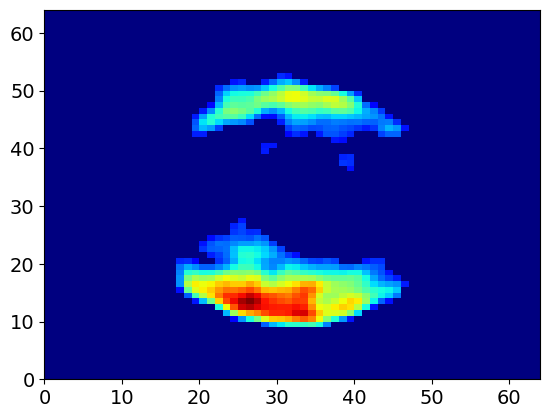

In [296]:
plt.pcolormesh(cVMIs[-1],cmap = 'jet')

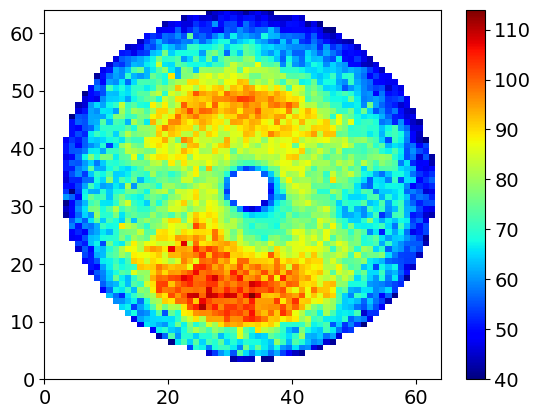

In [297]:
plt.pcolormesh(rebin(rebin(raw[-1],4),4), cmap = my_cmap, vmin = 40)#, vmax= 120)
plt.colorbar()

In [298]:
#basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_K5/'
basesdir = '/reg/d/psdm/tmo/tmox51020/results/paris/circularpol_vNbases_dipole_Feb/'
PR = PolarRebin('/reg/d/psdm/tmo/tmox51020/results/paris/recon/PR_c32_r32_th32.h5') 


In [299]:
fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
temp = np.load(fname, allow_pickle = True)[()]
ex1['dat'] = temp['dat']#[ex1['ID']]
ex1['maskhm'] = temp['maskhm']
ex1['mask'] = temp['mask']
ex1['eshift'] = temp['eshift']
ex1['mdatname'] = temp['mdatname']
ex1['specdatname'] = temp['specdatname']
ex1['thresh'] = temp['thresh']
ex1['gfsig']=temp['gfsig']

fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar20_123.npy'
temp = np.load(fname, allow_pickle = True)[()]
ex2['dat'] = temp['dat']#[ex2['ID']]
ex2['maskhm'] = temp['maskhm']
ex2['mask'] = temp['mask']
ex2['eshift'] = temp['eshift']
ex2['mdatname'] = temp['mdatname']
ex2['specdatname'] = temp['specdatname']
ex2['thresh'] = temp['thresh']
ex2['gfsig']=temp['gfsig']

fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar23_125.npy'
temp = np.load(fname, allow_pickle = True)[()]
ex3['dat'] = temp['dat']#[ex3['ID']]
ex3['maskhm'] = temp['maskhm']
ex3['mask'] = temp['mask']
ex3['eshift'] = temp['eshift']
ex3['mdatname'] = temp['mdatname']
ex3['specdatname'] = temp['specdatname']
ex3['thresh'] = temp['thresh']
ex3['gfsig']=temp['gfsig']

fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_May31_127.npy'
temp = np.load(fname, allow_pickle = True)[()]
ex4['dat'] = temp['dat']#[ex4['ID']]
ex4['maskhm'] = temp['maskhm']
ex4['mask'] = temp['mask']
ex4['eshift'] = temp['eshift']
ex4['mdatname'] = temp['mdatname']
ex4['specdatname'] = temp['specdatname']
ex4['thresh'] = temp['thresh']
ex4['gfsig']=temp['gfsig']

fname = '/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar12_112.npy'
temp = np.load(fname, allow_pickle = True)[()]
ex5['dat'] = temp['dat']#[ex4['ID']]
ex5['maskhm'] = temp['maskhm']
ex5['mask'] = temp['mask']
ex5['eshift'] = temp['eshift']
ex5['mdatname'] = temp['mdatname']
ex5['specdatname'] = temp['specdatname']
ex5['thresh'] = temp['thresh']
ex5['gfsig']=temp['gfsig']


gfcart = 0.25

In [300]:
examples = {'1':ex1, '2':ex2, '3':ex3, '4':ex4, '5':ex5}

In [301]:
len(np.hstack([np.squeeze(examples[d]['dat']['Up']) for d in examples]))

18895

In [302]:
Ups = np.unique(np.hstack([np.squeeze(examples[d]['dat']['Up']) for d in examples]))
Ups

array([0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.7 , 0.8 , 0.9 , 1.  , 1.1 ,
       1.2 ])

In [303]:
gfsig = np.unique(np.hstack([np.squeeze(examples[d]['gfsig']) for d in examples]))
gfsig

array([0.985])

In [304]:
Bps = []
alphas = []
vNaxiss = []
alphaws = []
N_w = 6
N_t = 6
Nb = N_w*N_t
for i in range(len(Ups)):
    Np = 128
    Up = Ups[i]  
    filename = 'Bpbasis_Np' + str(Np) + '_Nw' + str(N_w) +'_Nt' + str(N_t) + '_Up' + str(Up)+'.npy'
    print(filename)
    br = np.load(basesdir+filename, allow_pickle=True)
    Breal = br[()]['Breal']
    Bimag = br[()]['Bimag']
    breal = br[()]['breal']
    bimag = br[()]['bimag']
    vNaxis = br[()]['vNaxis']
    alpha = br[()]['alpha']

    
    tempr = np.zeros((Breal.shape[0], 64**2))
    tempi = np.zeros((Breal.shape[0], 64**2))
    for i in range(len(Breal)):
        tempr[i,:] = np.reshape(rebin(np.reshape(Breal[i,:], [128,128])), [64**2])
        tempi[i,:] = np.reshape(rebin(np.reshape(Bimag[i,:], [128,128])), [64**2])

    Breal = tempr
    Bimag = tempi

    alphw = np.zeros(alpha['t_sample'].shape, dtype = complex)
    for i in range(len(alphw)):
        f = interp1d(vNaxis['t_sample'], alpha['t_sample'][i], fill_value = 0, bounds_error = False)
        N = 2801 #1024
        ts = np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], N)
        alphw[i] = np.fft.ifftshift(np.fft.ifft(f(ts)))

    Np = 64
    for j in range(Breal.shape[0]):
        temp=np.reshape(Breal[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Breal[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpr[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))
        temp=np.reshape(Bimag[j,:],[Np,Np])
        polimg = PR.cart2pol(temp,32,32)
        bb = np.zeros((64,64))
        bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
        Bimag[j,:]=np.reshape(bb,newshape=(1,Np**2))
        #temp=scimg.filters.gaussian_filter(temp,0.8889)
        #Bpi[j,:]=Variable(Tensor(np.reshape(temp,newshape=(1,Np**2))))

    Bp_basis = Breal+1j*Bimag

    Bps.append(Bp_basis)
    alphas.append(alpha)
    vNaxiss.append(vNaxis)
    alphaws.append(alphw)

Bpbasis_Np128_Nw6_Nt6_Up0.05.npy


/tmp/ipykernel_15112/2051486033.py:43: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))
/tmp/ipykernel_15112/2051486033.py:50: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  bb[1:64,1:64]= PR.pol2cart(scimg.filters.gaussian_filter(polimg,[gfsig,0]))


Bpbasis_Np128_Nw6_Nt6_Up0.1.npy
Bpbasis_Np128_Nw6_Nt6_Up0.2.npy
Bpbasis_Np128_Nw6_Nt6_Up0.3.npy
Bpbasis_Np128_Nw6_Nt6_Up0.4.npy
Bpbasis_Np128_Nw6_Nt6_Up0.5.npy
Bpbasis_Np128_Nw6_Nt6_Up0.7.npy
Bpbasis_Np128_Nw6_Nt6_Up0.8.npy
Bpbasis_Np128_Nw6_Nt6_Up0.9.npy
Bpbasis_Np128_Nw6_Nt6_Up1.0.npy
Bpbasis_Np128_Nw6_Nt6_Up1.1.npy
Bpbasis_Np128_Nw6_Nt6_Up1.2.npy


In [103]:
l = 0

In [119]:
examples[str(l+1)]['ID']

[8]

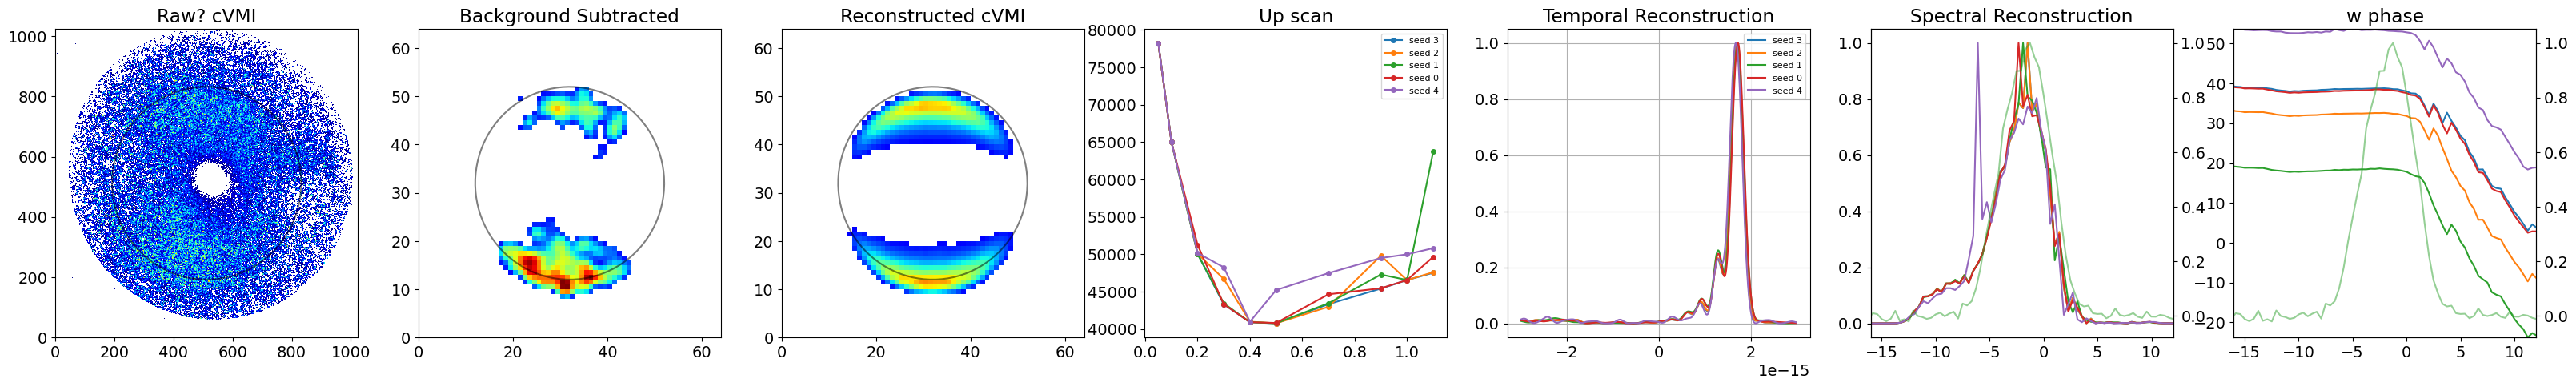

In [164]:
fwhms = []
std_t = []
ups_b = []
fwhms_avg = []
fwhms_maxs = []
fwhms2_maxs = []

exnum = 2
dat = examples[str(exnum)]['dat']
idn = examples[str(exnum)]['ID'][0]
eshift = np.unique(dat['eshift'])
thresh = examples[str(exnum)]['thresh']
mask = examples[str(exnum)]['mask']
mdat= np.load(examples[str(exnum)]['mdatname'] , allow_pickle = True)[()]
specdat = np.load(examples[str(exnum)]['specdatname'], allow_pickle = True)[()]
gds = np.load((examples[str(exnum)]['mdatname']).split('Ms')[-0]+'GDs'+(examples[str(exnum)]['mdatname']).split('Ms')[-1],allow_pickle=True)[()]
#wr = 1200 #1340
wr = 1340

fig,axs = plt.subplots(ncols =7, figsize = (40,5))

axs[0].pcolormesh(raw[exnum],cmap = my_cmap, vmin = 40)
axs[0].plot(32*16+ 20*16*np.cos(phis), 32*16+ 20*16*np.sin(phis), 'k-', alpha = 0.5)

uplook = dat[(dat['ID'] == idn)]['Up'][np.argmin(dat[(dat['ID'] == idn)]['costs'][:,-1])]
u = int(np.where(Ups == uplook)[0])
seed_order = np.argsort(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['costs'][:,-1])
seeds = np.unique(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['seed'])
#seed_order = np.arange(len(seeds))
duration = []
ets = []

for ss in range(len(seeds)):   

    x = dat[(dat['ID'] == idn)&(dat['seed'] == seeds[seed_order[ss]])]['Up']
    y= dat[(dat['ID'] == idn)&(dat['seed'] == seeds[seed_order[ss]])]['costs'][:,-1]
    #y= dat[(dat['ID'] == IDs[k])]['costM'][:,-1]
    axs[3].plot(x[np.argsort(x)], y[np.argsort(x)], '-o', label = 'seed %1.0f' %seeds[seed_order[ss]])

    if ss == len(seeds)-1:
        axs[3].set_title('Up')
        axs[3].legend(fontsize = 8)


Bp = Bps[u]
vNaxis = vNaxiss[u]
alpha = alphas[u]
alphw = alphaws[u]
ts= vNaxis['t_sample']

t1 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][0])**2) 
t2 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][-1])**2)


m = mdat[idn]
spec = specdat[idn]
#spec = np.roll(spec,30)
m = m/np.sum(m)
N = 2801
xf = np.arange(-N/2-1/2,N/2-1/2,1)/np.abs(vNaxis['t_sample'][0])/2
# xf = np.arange(-N/2+1/2,N/2+1/2,1)/((vNaxis['t_sample'][-1] - vNaxis['t_sample'][0])) #using tsample range
eV = 1239.84*(2*np.pi*xf)/2.9979E8/(2*np.pi)*1e-9 
#Interpolate spec outside of the loop to match eV
xeV = pix_2_eV(np.arange(1024), pixpereV = 22, spectra_hw0 = 0, spectra_pix0 = 512)
xeV = xeV - 2 #eshift#3 #know this from previous calibration

for s in range(len(seeds)):

    if len(seeds)>1:
        Q = np.squeeze(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['Qs'][seeds[seed_order[s]],:])
    else:
        Q = np.squeeze(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['Qs'])
    N_basis = 36
    eVshift_idx = 0
    Q1=Q[0:N_basis]
    Q1=np.reshape(Q1,[1,N_basis])
    Q2=np.concatenate(([0],Q[N_basis:2*N_basis-1]))
    Q2=np.reshape(Q2,[1,N_basis])
    Qguess=Q1+1j*Q2
    Qguess=np.reshape(Qguess,[N_basis,1])
    Mgr=np.real(np.matmul(np.matmul(Qguess,Qguess.conj().transpose()).transpose().flatten(),Bp))
    Mgr=Mgr/np.sum(Mgr)
    Mgr[Mgr<thresh] = 0
    Mgr=Mgr/np.sum(Mgr)

    alpha_t = alpha['t_sample']/np.max(np.abs(alpha['t_sample'])) ##take out carrier
    #alpha_t = alpha['t']/np.max(np.abs(alpha['t'])) #alpha_t = alpha_t*np.exp(-1.j*(energy_x)/hbar*np.tile(vNaxis['t'],(N_basis,1)))
    Et = np.squeeze(np.matmul(Qguess.T,alpha_t))

    f = interp1d(vNaxis['t_sample'],Et, fill_value = 0, bounds_error = False)
    Et_l = f(np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], len(vNaxis['t_sample'])))
    aghh = np.argmax(np.abs(Et_l))
    Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et_l,-aghh))) #need this to get imag part, must be evenly spaced
    #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
    EwEw = np.real(Ew*Ew.conj())
    EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
    EwEw = EwEw/np.max(EwEw)
    wphase = np.unwrap(np.angle(Ew))
    wphase = wphase - np.mean(wphase)
    Ew = np.squeeze(np.matmul(Qguess.T,alphw)) 
    EwEw = np.real(Ew*Ew.conj())
    EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
    EwEw = EwEw/np.max(EwEw)


#             aghh = np.argmax(np.abs(Et))
#             Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et,-aghh))) #need this to get imag part
#             #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
#             EwEw = np.real(Ew*Ew.conj())
#             EwEw = EwEw[1340-eVshift_idx:-1340-eVshift_idx]
#             EwEw = EwEw/np.max(EwEw)
#             wphase = np.unwrap(np.angle(Ew))
#             wphase = wphase - np.mean(wphase)

    phis = np.linspace(0,359,100)*np.pi/180
    if s == 0:

        pscale = 1/np.max(m/np.sum(m*mask))
        Mt = m/np.sum(m*mask)*pscale
        Mp = pscale*np.reshape(Mgr/np.sum(mask*np.reshape(Mgr, [64,64])), [64,64])
        #Mp = Mp/np.max(Mp)
        #tosave[str(k) + '_Q'] = Q
        #tosave[str(k) + '_Up'] = uplook
        p =axs[1].pcolormesh(Mt, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))
        axs[1].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
        #axs[1].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
        #plt.colorbar(p, ax = axs[1])
        #axs[1].set_title(str(idn)+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[idn]))
        ups_b.append(uplook)

        p =axs[2].pcolormesh(Mp, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))#, vmin = np.min(m), vmax = np.max(m))
        #plt.colorbar(p, ax = axs[2])
        phis = np.linspace(0,359,100)*np.pi/180
        axs[2].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
        #axs[2].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)

        # p = axs[3].pcolormesh((Mt-Mp)*mask, cmap = 'bwr')
        # axs[3].set_title('%1.4f' %np.sum(np.abs(Mt-Mp)*mask))
        # #p = axs[2].pcolormesh(m-np.reshape(Mgr, [64,64]), cmap = 'bwr')
        # axs[3].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
        # axs[3].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
        # plt.colorbar(p, ax = axs[3])

        f = interp1d(xeV,spec, bounds_error=False, fill_value = 0)
        spec_in = f(eV[wr:-wr])
        ############# spec cal
        xxx1 = np.arange(len(spec_in))
        f = interp1d(xxx1, spec_in, fill_value = 0, bounds_error = False)
        xs = np.linspace((xxx1[0] -np.argmax(spec_in)), (xxx1[-1]-np.argmax(spec_in)), len(xxx1))+np.argmax(spec_in)
        spec_in = f(xs)
        #########

        spec_in=spec_in/np.max(spec_in)
        ax1 = axs[6].twinx()
        ax1.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)
        ax = axs[5].twinx()
        ax.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)


    
    #axs[l][4].set_title('t')
    axs[5].plot(np.linspace(eV[wr],eV[-wr], len(EwEw)), np.squeeze(EwEw))
    #ax.set_ylim(axs[5].get_ylim())
    EtEt = np.abs(Et*Et.conj())
    EtEt = EtEt/np.max(EtEt)
    axs[4].plot(ts[t1:t2], EtEt[t1:t2],label = 'seed %1.0f' %seeds[seed_order[s]])
    axs[4].grid()
    #axs[l][4].set_xlim(-4e-15,4e-15)

    roll_to = np.argmax(EtEt[t1:t2])
    # a,mu,sig = gaus_fit(ts*1e15,np.roll(EtEt, int(len(EtEt)/2)-roll_to))
    # duration.append(2.355*sig)

    #duration.append(FWHM(ts[t1:t2]*1e15,np.roll(EtEt[t1:t2], int(len(EtEt[t1:t2])/2)-roll_to)))
    ets.append(EtEt)

    

    axs[6].plot(eV[wr-eVshift_idx:-wr-eVshift_idx], wphase[wr-eVshift_idx:-wr-eVshift_idx])
    mid = int(len(eV[wr-eVshift_idx:-wr-eVshift_idx])/4)
    if s == 0: ymin,ymax = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]),np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
    if s>0: 
        if np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) < ymin: ymin = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
        if np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) > ymax: ymax = np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
    axs[6].set_ylim(ymin,ymax)
    if s == len(seeds)-1: axs[4].legend(fontsize = 8)
#axs[4].set_title('t FWHM = %1.3f fs' %np.mean(duration)) 
axs[5].set_xlim(-16,12)
axs[6].set_xlim(-16,12)
EtEtm = np.mean(ets,axis = 0)
EtEtmax = np.max(ets,axis = 0)
#fwhms2_maxs.append(FWHM2(ts[t1:t2]*1e15,np.roll(EtEtmax[t1:t2], int(len(EtEtmax[t1:t2])/2)--np.argmax(EtEtmax[t1:t2]))))
#fwhms.append(np.mean(duration))
#fwhms_avg.append(FWHM(ts*1e15, np.roll(EtEtm[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
#fwhms_maxs.append(FWHM(ts*1e15, np.roll(EtEtmax[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
#std_t.append(np.sum(np.std(np.array(ets),axis = 0)))

axs[1].set_title(str(idn)+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[idn]))
axs[5].set_title('w')
axs[6].set_title('w phase')

axs[0].set_title('Raw? cVMI')
axs[1].set_title('Background Subtracted')
axs[2].set_title('Reconstructed cVMI')
axs[3].set_title('Up scan')
axs[4].set_title('Temporal Reconstruction')
axs[5].set_title('Spectral Reconstruction')
plt.show()

In [325]:
np.hstack(examples[d]['ID'] for d in examples)

/tmp/ipykernel_15112/2463244820.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.hstack(examples[d]['ID'] for d in examples)


array([  8,  95,  13,  12,  13,  33, 114, 171, 195])

In [326]:
np.argmin((np.hstack(examples[d]['ID'] for d in examples)-33)**2)

/tmp/ipykernel_15112/2570787305.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.argmin((np.hstack(examples[d]['ID'] for d in examples)-33)**2)


5

In [365]:
examples['4']['ID']

[12, 13]

In [339]:
idn

171

In [338]:
np.unique(dat['ID'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169])

In [361]:
f = np.load('/reg/d/psdm/tmo/tmox51020/results/paris/recon/torch_Mar28_112.npy', allow_pickle = True)[()]

In [347]:
np.max(f['dat']['ID'])

203

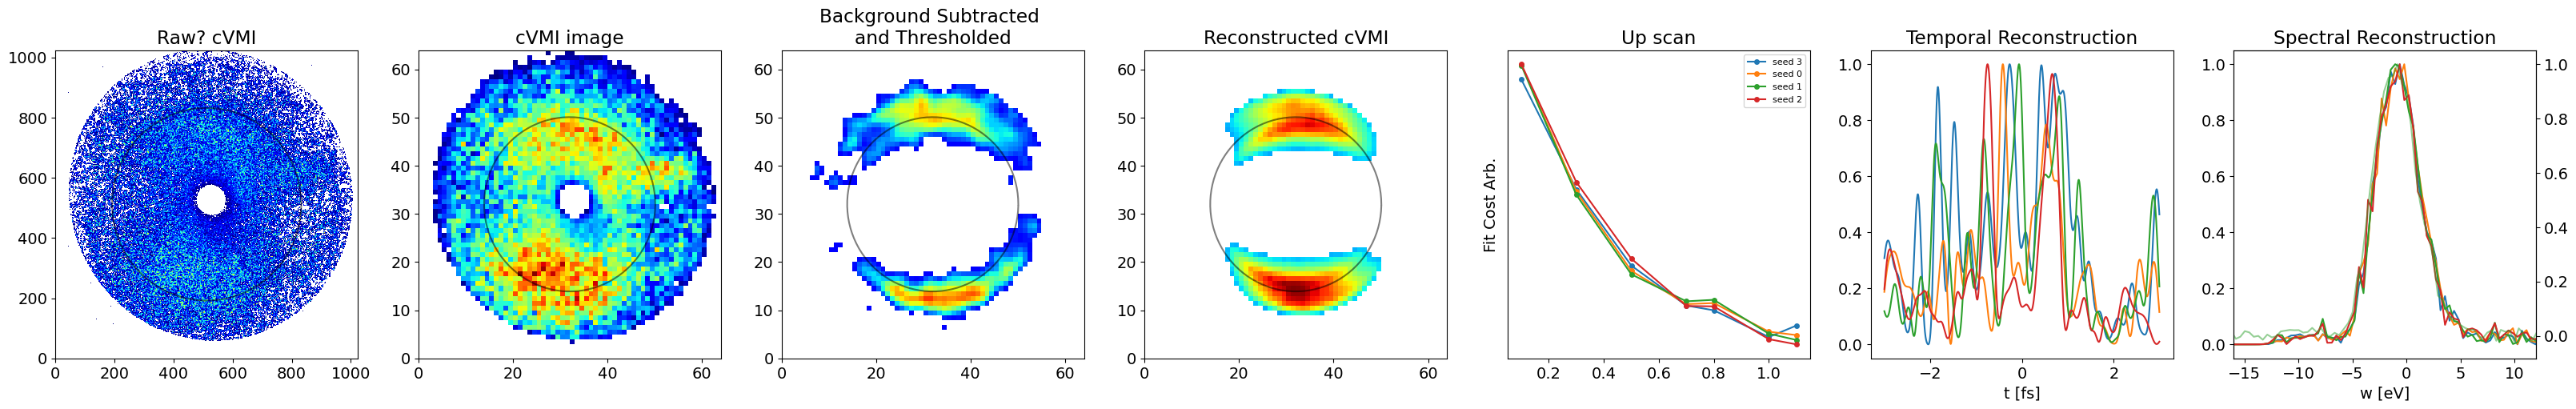

In [370]:
fwhms = []
std_t = []
ups_b = []
fwhms_avg = []
fwhms_maxs = []
fwhms2_maxs = []

exnum = 1
cVMInum = 0
#dat = f['dat'] 
dat = examples[str(exnum)]['dat']
idn = examples[str(exnum)]['ID'][0]
eshift = np.unique(dat['eshift'])
thresh = examples[str(exnum)]['thresh']
mask = examples[str(exnum)]['mask']
mdat= np.load(examples[str(exnum)]['mdatname'] , allow_pickle = True)[()]
specdat = np.load(examples[str(exnum)]['specdatname'], allow_pickle = True)[()]
gds = np.load((examples[str(exnum)]['mdatname']).split('Ms')[-0]+'GDs'+(examples[str(exnum)]['mdatname']).split('Ms')[-1],allow_pickle=True)[()]
#wr = 1200 #1340
wr = 1340

fig,axs = plt.subplots(ncols =7, figsize = (40,5))

axs[0].pcolormesh(raw[cVMInum],cmap = my_cmap, vmin = 40)
axs[0].plot(32*16+ 20*16*np.cos(phis), 32*16+ 20*16*np.sin(phis), 'k-', alpha = 0.5)
axs[1].pcolormesh(rebin(rebin(raw[cVMInum],4),4),cmap = my_cmap, vmin = 40)
axs[1].plot(32+18.1*np.cos(phis), 32+ 18.1*np.sin(phis), 'k-', alpha = 0.5)
###axs[1].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
uplook = dat[(dat['ID'] == idn)]['Up'][np.argmin(dat[(dat['ID'] == idn)]['costs'][:,-1])]
u = int(np.where(Ups == uplook)[0])
seed_order = np.argsort(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['costs'][:,-1])
seeds = np.unique(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['seed'])
#seed_order = np.arange(len(seeds))
duration = []
ets = []

for ss in range(len(seeds)):   

    x = dat[(dat['ID'] == idn)&(dat['seed'] == seeds[seed_order[ss]])]['Up']
    y= dat[(dat['ID'] == idn)&(dat['seed'] == seeds[seed_order[ss]])]['costs'][:,-1]
    #y= dat[(dat['ID'] == IDs[k])]['costM'][:,-1]
    axs[4].plot(x[np.argsort(x)], y[np.argsort(x)], '-o', label = 'seed %1.0f' %seeds[seed_order[ss]])

    if ss == len(seeds)-1:
        axs[4].set_title('Up')
        axs[4].legend(fontsize = 8)


Bp = Bps[u]
vNaxis = vNaxiss[u]
alpha = alphas[u]
alphw = alphaws[u]
ts= vNaxis['t_sample']

t1 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][0])**2) 
t2 = np.argmin((vNaxis['t_sample'] -vNaxis['t'][-1])**2)


m = mdat[idn]
spec = specdat[idn]
#spec = np.roll(spec,30)
m = m/np.sum(m)
N = 2801
xf = np.arange(-N/2-1/2,N/2-1/2,1)/np.abs(vNaxis['t_sample'][0])/2
# xf = np.arange(-N/2+1/2,N/2+1/2,1)/((vNaxis['t_sample'][-1] - vNaxis['t_sample'][0])) #using tsample range
eV = 1239.84*(2*np.pi*xf)/2.9979E8/(2*np.pi)*1e-9 
#Interpolate spec outside of the loop to match eV
xeV = pix_2_eV(np.arange(1024), pixpereV = 22, spectra_hw0 = 0, spectra_pix0 = 512)
xeV = xeV - eshift#3 #know this from previous calibration

for s in range(len(seeds)):

    if len(seeds)>1:
        Q = np.squeeze(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['Qs'][seeds[seed_order[s]],:])
    else:
        Q = np.squeeze(dat[(dat['ID'] == idn)&(dat['Up'] == uplook)]['Qs'])
    N_basis = 36
    eVshift_idx = 0
    Q1=Q[0:N_basis]
    Q1=np.reshape(Q1,[1,N_basis])
    Q2=np.concatenate(([0],Q[N_basis:2*N_basis-1]))
    Q2=np.reshape(Q2,[1,N_basis])
    Qguess=Q1+1j*Q2
    Qguess=np.reshape(Qguess,[N_basis,1])
    Mgr=np.real(np.matmul(np.matmul(Qguess,Qguess.conj().transpose()).transpose().flatten(),Bp))
    Mgr=Mgr/np.sum(Mgr)
    Mgr[Mgr<thresh] = 0
    Mgr=Mgr/np.sum(Mgr)

    alpha_t = alpha['t_sample']/np.max(np.abs(alpha['t_sample'])) ##take out carrier
    #alpha_t = alpha['t']/np.max(np.abs(alpha['t'])) #alpha_t = alpha_t*np.exp(-1.j*(energy_x)/hbar*np.tile(vNaxis['t'],(N_basis,1)))
    Et = np.squeeze(np.matmul(Qguess.T,alpha_t))

    f = interp1d(vNaxis['t_sample'],Et, fill_value = 0, bounds_error = False)
    Et_l = f(np.linspace(vNaxis['t_sample'][0],-vNaxis['t_sample'][0], len(vNaxis['t_sample'])))
    aghh = np.argmax(np.abs(Et_l))
    Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et_l,-aghh))) #need this to get imag part, must be evenly spaced
    #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
    EwEw = np.real(Ew*Ew.conj())
    EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
    EwEw = EwEw/np.max(EwEw)
    wphase = np.unwrap(np.angle(Ew))
    wphase = wphase - np.mean(wphase)
    Ew = np.squeeze(np.matmul(Qguess.T,alphw)) 
    EwEw = np.real(Ew*Ew.conj())
    EwEw = EwEw[wr-eVshift_idx:-wr-eVshift_idx]
    EwEw = EwEw/np.max(EwEw)


#             aghh = np.argmax(np.abs(Et))
#             Ew = np.fft.ifftshift(np.fft.ifft(np.roll(Et,-aghh))) #need this to get imag part
#             #Ew = np.squeeze(np.matmul(Qguess.T,alphw))
#             EwEw = np.real(Ew*Ew.conj())
#             EwEw = EwEw[1340-eVshift_idx:-1340-eVshift_idx]
#             EwEw = EwEw/np.max(EwEw)
#             wphase = np.unwrap(np.angle(Ew))
#             wphase = wphase - np.mean(wphase)

    phis = np.linspace(0,359,100)*np.pi/180
    if s == 0:

        pscale = 1/np.max(m/np.sum(m*mask))
        Mt = m/np.sum(m*mask)*pscale
        Mp = pscale*np.reshape(Mgr/np.sum(mask*np.reshape(Mgr, [64,64])), [64,64])
        #Mp = Mp/np.max(Mp)
        #tosave[str(k) + '_Q'] = Q
        #tosave[str(k) + '_Up'] = uplook
        p =axs[2].pcolormesh(Mt, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))
        axs[2].plot(32+18.1*np.cos(phis), 32+ 18.1*np.sin(phis), 'k-', alpha = 0.5)
        #axs[2].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
        #plt.colorbar(p, ax = axs[1])
        #axs[1].set_title(str(idn)+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[idn]))
        ups_b.append(uplook)

        p =axs[3].pcolormesh(Mp, cmap = my_cmap,vmax = np.max([np.max(Mp),1]))#, vmin = np.min(m), vmax = np.max(m))
        #plt.colorbar(p, ax = axs[2])
        phis = np.linspace(0,359,100)*np.pi/180
        axs[3].plot(32+18.1*np.cos(phis), 32+ 18.1*np.sin(phis), 'k-', alpha = 0.5)
    ###axs[3].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
        #axs[3].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)

        # p = axs[3].pcolormesh((Mt-Mp)*mask, cmap = 'bwr')
        # axs[3].set_title('%1.4f' %np.sum(np.abs(Mt-Mp)*mask))
        # #p = axs[2].pcolormesh(m-np.reshape(Mgr, [64,64]), cmap = 'bwr')
        # axs[3].plot(32+ 20*np.cos(phis), 32+ 20*np.sin(phis), 'k-', alpha = 0.5)
        # axs[3].plot(32+ 18.5*np.cos(phis), 32+ 18.5*np.sin(phis), 'k--', alpha = 0.5)
        # plt.colorbar(p, ax = axs[3])

        f = interp1d(xeV,spec, bounds_error=False, fill_value = 0)
        spec_in = f(eV[wr:-wr])
        ############# spec cal
        xxx1 = np.arange(len(spec_in))
        f = interp1d(xxx1, spec_in, fill_value = 0, bounds_error = False)
        xs = np.linspace((xxx1[0] -np.argmax(spec_in)), (xxx1[-1]-np.argmax(spec_in)), len(xxx1))+np.argmax(spec_in)
        spec_in = f(xs)
        #########

        spec_in=spec_in/np.max(spec_in)
        # ax1 = axs[6].twinx()
        # ax1.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)
        ax = axs[6].twinx()
        ax.plot(eV[wr:-wr], spec_in, color= 'tab:green', alpha = 0.5)


    
    #axs[l][4].set_title('t')
    axs[6].plot(np.linspace(eV[wr],eV[-wr], len(EwEw)), np.squeeze(EwEw))
    #ax.set_ylim(axs[5].get_ylim())
    EtEt = np.abs(Et*Et.conj())
    EtEt = EtEt/np.max(EtEt)
    axs[5].plot(ts[t1:t2]*1e15, EtEt[t1:t2],label = 'seed %1.0f' %seeds[seed_order[s]])
    #axs[5].grid()
    #axs[l][4].set_xlim(-4e-15,4e-15)

    roll_to = np.argmax(EtEt[t1:t2])
    # a,mu,sig = gaus_fit(ts*1e15,np.roll(EtEt, int(len(EtEt)/2)-roll_to))
    # duration.append(2.355*sig)

    #duration.append(FWHM(ts[t1:t2]*1e15,np.roll(EtEt[t1:t2], int(len(EtEt[t1:t2])/2)-roll_to)))
    ets.append(EtEt)

    

    # axs[6].plot(eV[wr-eVshift_idx:-wr-eVshift_idx], wphase[wr-eVshift_idx:-wr-eVshift_idx])
    # mid = int(len(eV[wr-eVshift_idx:-wr-eVshift_idx])/4)
    # if s == 0: ymin,ymax = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]),np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
    # if s>0: 
    #     if np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) < ymin: ymin = np.min(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
    #     if np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid]) > ymax: ymax = np.max(wphase[wr-eVshift_idx:-wr-eVshift_idx][mid:-mid])
    # axs[6].set_ylim(ymin,ymax)
    if s == len(seeds)-1: axs[4].legend(fontsize = 8)
#axs[4].set_title('t FWHM = %1.3f fs' %np.mean(duration)) 
axs[6].set_xlim(-16,12)
EtEtm = np.mean(ets,axis = 0)
EtEtmax = np.max(ets,axis = 0)
#fwhms2_maxs.append(FWHM2(ts[t1:t2]*1e15,np.roll(EtEtmax[t1:t2], int(len(EtEtmax[t1:t2])/2)--np.argmax(EtEtmax[t1:t2]))))
#fwhms.append(np.mean(duration))
#fwhms_avg.append(FWHM(ts*1e15, np.roll(EtEtm[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
#fwhms_maxs.append(FWHM(ts*1e15, np.roll(EtEtmax[t1:t2], int(len(EtEtm[t1:t2])/2)-np.argmax(EtEtm[t1:t2]))))
#std_t.append(np.sum(np.std(np.array(ets),axis = 0)))

axs[1].set_title(str(idn)+', '+str(uplook)+', GMD = %1.0f uJ' %(1000*gds[idn]))
axs[5].set_title('w')
axs[6].set_title('w phase')

axs[0].set_title('Raw? cVMI')
axs[1].set_title('cVMI image')
axs[2].set_title('Background Subtracted \nand Thresholded')
axs[3].set_title('Reconstructed cVMI')
axs[4].set_title('Up scan')
axs[5].set_title('Temporal Reconstruction')
axs[6].set_title('Spectral Reconstruction')
#plt.suptitle('put the mask hole somewhere- superimpose it')
# axs[1].pcolormesh(maskp, cmap = mask_cmap)
# axs[2].pcolormesh(maskp, cmap = mask_cmap)
# axs[3].pcolormesh(maskp, cmap = mask_cmap)
axs[4].set_yticks([])
axs[4].set_ylabel('Fit Cost Arb.')
axs[5].set_xlabel('t [fs]')
axs[6].set_xlabel('w [eV]')
#axs[5].grid()
plt.show()
#print(eshift)

In [246]:
mask_cmap = cm.get_cmap('binary_r')
xr = np.linspace(0, 1, 2000)
mask_cmap = mask_cmap(xr)
mask_cmap[-1000:][:,-1] = 0
mask_cmap[:1000][:,-1] = 0.7
mask_cmap = ListedColormap(mask_cmap)

(1024, 1024)

In [265]:
maskp = np.copy(mask)
X,Y=np.meshgrid(np.arange(64),np.arange(64))
rs=np.sqrt((X-32)**2+(Y-32)**2)
maskp[(rs>25)]=1

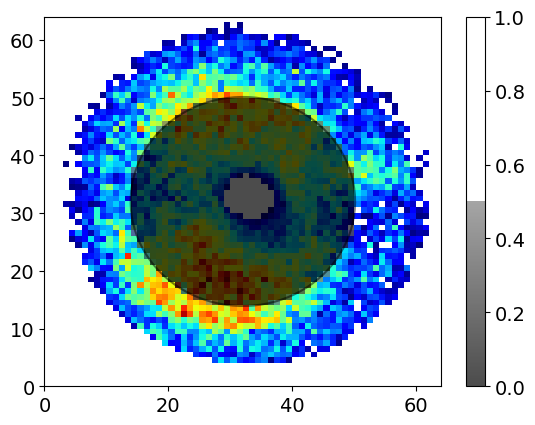

In [277]:
plt.pcolormesh(rebin(rebin(raw[exnum],4),4),cmap = my_cmap, vmin = 40)
plt.pcolormesh(maskp, cmap = mask_cmap)
plt.plot(32+18.1*np.cos(phis), 32+ 18.1*np.sin(phis), 'k-', alpha = 0.5)
plt.colorbar()

In [169]:
chose a characteristic shot 

0.2008056640625

In [ ]:
get the median pulse energy

sincd already cutting in beam energy, should include the lower shots below GMD threshold
can throwaway low energy if the spectra looks bad for the bandwidth one